In [88]:
!ls /kaggle/input/sistema-de-informaes-hospitalares-sus

RD202401.csv  RD202404.csv  RD202407.csv  RD202410.csv
RD202402.csv  RD202405.csv  RD202408.csv  RD202411.csv
RD202403.csv  RD202406.csv  RD202409.csv  RD202412.csv


In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Configura a biblioteca pandas para exibir todos os itens da sequência do base de dados
pd.options.display.max_seq_items = 113

# Carrega a base de dados
df = pd.read_csv('/kaggle/input/sistema-de-informaes-hospitalares-sus/RD202401.csv', sep=';', low_memory=False)
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
0,120000,2024,1,3,4.034526e+12,1224100031374,1,69911814,120040,19560415,...,NaN,0,0,0,0,0,0,0,0,0
1,120000,2024,1,3,4.034526e+12,1224100031539,1,69900970,120040,19520515,...,NaN,0,0,0,0,0,0,0,0,0
2,120000,2024,1,3,4.034526e+12,1224100031550,1,69934000,120025,19980315,...,NaN,0,0,0,0,0,0,0,0,0
3,120000,2024,1,3,4.034526e+12,1224100031650,1,69900100,120040,19460726,...,NaN,0,0,0,0,0,0,0,0,0
4,120000,2024,1,3,4.034526e+12,1224100031814,1,69900970,120040,20200313,...,NaN,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107872,172120,2024,1,2,NaN,1724100104430,1,77900000,172120,20011130,...,NaN,0,0,0,0,0,0,0,0,0
1107873,172120,2024,1,2,NaN,1724100104441,1,77900000,172120,19950319,...,NaN,0,0,0,0,0,0,0,0,0
1107874,172120,2024,1,2,NaN,1724100104452,1,77958000,172010,20010904,...,NaN,0,0,0,0,0,0,0,0,0
1107875,172120,2024,1,2,NaN,1724100104463,1,77950000,170220,19930609,...,NaN,0,0,0,0,0,0,0,0,0


In [90]:
# Mostra as 10 primeiras linhas
df.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
0,120000,2024,1,3,4.034526e+12,1224100031374,1,69911814,120040,19560415,...,NaN,0,0,0,0,0,0,0,0,0
1,120000,2024,1,3,4.034526e+12,1224100031539,1,69900970,120040,19520515,...,NaN,0,0,0,0,0,0,0,0,0
2,120000,2024,1,3,4.034526e+12,1224100031550,1,69934000,120025,19980315,...,NaN,0,0,0,0,0,0,0,0,0
3,120000,2024,1,3,4.034526e+12,1224100031650,1,69900100,120040,19460726,...,NaN,0,0,0,0,0,0,0,0,0
4,120000,2024,1,3,4.034526e+12,1224100031814,1,69900970,120040,20200313,...,NaN,0,0,0,0,0,0,0,0,0
5,120000,2024,1,3,4.034526e+12,1224100031847,1,69990000,120033,19430204,...,NaN,0,0,0,0,0,0,0,0,0
6,120000,2024,1,3,4.034526e+12,1224100031858,1,69900970,120040,19840406,...,NaN,0,0,0,0,0,0,0,0,0
7,120000,2024,1,3,4.034526e+12,1224100031891,1,69925000,120045,19860612,...,NaN,0,0,0,0,0,0,0,0,0
8,120000,2024,1,3,4.034526e+12,1224100031913,1,69900970,120040,19600306,...,NaN,0,0,0,0,0,0,0,0,0
9,120000,2024,1,3,4.034526e+12,1224100031946,1,69900970,120040,19460426,...,NaN,0,0,0,0,0,0,0,0,0


In [91]:
# Mostra as 5 últimas linhas
df.tail()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
1107872,172120,2024,1,2,NaN,1724100104430,1,77900000,172120,20011130,...,NaN,0,0,0,0,0,0,0,0,0
1107873,172120,2024,1,2,NaN,1724100104441,1,77900000,172120,19950319,...,NaN,0,0,0,0,0,0,0,0,0
1107874,172120,2024,1,2,NaN,1724100104452,1,77958000,172010,20010904,...,NaN,0,0,0,0,0,0,0,0,0
1107875,172120,2024,1,2,NaN,1724100104463,1,77950000,170220,19930609,...,NaN,0,0,0,0,0,0,0,0,0
1107876,172120,2024,1,2,NaN,1724100104474,1,77900000,172120,20030802,...,NaN,0,0,0,0,0,0,0,0,0


In [92]:
# Gera estatísticas iniciais resumidas da base de dados
df.describe()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
count,1.107877e+06,1107877.0,1107877.0,1.107877e+06,8.258420e+05,1.107877e+06,1.107877e+06,1.107877e+06,1.107877e+06,1.107877e+06,...,0.0,1.107877e+06,1.107877e+06,1.107877e+06,1.107877e+06,1.107877e+06,1.107877e+06,1.107877e+06,1107877.0,1107877.0
mean,3.285390e+05,2024.0,1.0,2.925295e+00,3.462298e+13,3.299631e+12,1.039485e+00,5.113521e+07,3.290532e+05,1.980077e+07,...,NaN,3.059563e-01,3.168493e-02,1.288139e-02,5.540326e-03,2.147350e-03,7.591095e-04,2.743987e-04,0.0,0.0
std,9.546316e+04,0.0,0.0,5.162891e+00,2.785485e+13,9.544371e+11,3.954481e-01,2.786756e+07,9.559335e+04,2.443626e+05,...,NaN,6.053416e-01,1.986136e-01,1.263739e-01,8.365986e-02,5.281120e-02,3.188551e-02,1.928231e-02,0.0,0.0
min,1.100000e+05,2024.0,1.0,1.000000e+00,3.394000e+10,1.123100e+12,1.000000e+00,1.001000e+06,1.100010e+05,1.895032e+07,...,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
25%,2.611600e+05,2024.0,1.0,1.000000e+00,1.057205e+13,2.624109e+12,1.000000e+00,2.732537e+07,2.613800e+05,1.960043e+07,...,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
50%,3.302700e+05,2024.0,1.0,2.000000e+00,2.545926e+13,3.323111e+12,1.000000e+00,5.555500e+07,3.303500e+05,1.981091e+07,...,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
75%,4.100000e+05,2024.0,1.0,3.000000e+00,5.235627e+13,4.123111e+12,1.000000e+00,7.495336e+07,4.104800e+05,1.999030e+07,...,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
max,5.300000e+05,2024.0,1.0,8.700000e+01,9.871488e+13,9.924300e+12,5.000000e+00,9.999000e+07,5.300100e+05,2.024013e+07,...,NaN,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,0.0,0.0


In [93]:
# Mostra as colunas em sequência da base de dados
df.columns

Index(['UF_ZI', 'ANO_CMPT', 'MES_CMPT', 'ESPEC', 'CGC_HOSP', 'N_AIH', 'IDENT',
       'CEP', 'MUNIC_RES', 'NASC', 'SEXO', 'UTI_MES_IN', 'UTI_MES_AN',
       'UTI_MES_AL', 'UTI_MES_TO', 'MARCA_UTI', 'UTI_INT_IN', 'UTI_INT_AN',
       'UTI_INT_AL', 'UTI_INT_TO', 'DIAR_ACOM', 'QT_DIARIAS', 'PROC_SOLIC',
       'PROC_REA', 'VAL_SH', 'VAL_SP', 'VAL_SADT', 'VAL_RN', 'VAL_ACOMP',
       'VAL_ORTP', 'VAL_SANGUE', 'VAL_SADTSR', 'VAL_TRANSP', 'VAL_OBSANG',
       'VAL_PED1AC', 'VAL_TOT', 'VAL_UTI', 'US_TOT', 'DT_INTER', 'DT_SAIDA',
       'DIAG_PRINC', 'DIAG_SECUN', 'COBRANCA', 'NATUREZA', 'NAT_JUR', 'GESTAO',
       'RUBRICA', 'IND_VDRL', 'MUNIC_MOV', 'COD_IDADE', 'IDADE', 'DIAS_PERM',
       'MORTE', 'NACIONAL', 'NUM_PROC', 'CAR_INT', 'TOT_PT_SP', 'CPF_AUT',
       'HOMONIMO', 'NUM_FILHOS', 'INSTRU', 'CID_NOTIF', 'CONTRACEP1',
       'CONTRACEP2', 'GESTRISCO', 'INSC_PN', 'SEQ_AIH5', 'CBOR', 'CNAER',
       'VINCPREV', 'GESTOR_COD', 'GESTOR_TP', 'GESTOR_CPF', 'GESTOR_DT',
       'CNES', 'CNPJ_M

In [94]:
# Delimitar as colunas de interesse em recorte da base de dados
df = df[[
    'UF_ZI', 'ANO_CMPT', 'MES_CMPT', 'ESPEC', 'N_AIH', 'IDENT', 'CEP', 'MUNIC_RES', 'NASC', 'SEXO',
    'UTI_MES_TO', 'MARCA_UTI', 'UTI_INT_TO', 'DIAR_ACOM', 'QT_DIARIAS', 'PROC_SOLIC',
    'PROC_REA', 'VAL_SH', 'VAL_SP', 'VAL_TOT', 'VAL_UTI', 'US_TOT', 'DT_INTER', 'DT_SAIDA',
    'DIAG_PRINC', 'DIAG_SECUN', 'COBRANCA', 'NATUREZA', 'NAT_JUR', 'GESTAO',
    'IND_VDRL', 'MUNIC_MOV', 'COD_IDADE', 'IDADE', 'DIAS_PERM', 'MORTE', 'NACIONAL',
    'CAR_INT', 'HOMONIMO', 'NUM_FILHOS', 'INSTRU', 'CID_NOTIF', 'CONTRACEP1',
    'CONTRACEP2', 'GESTRISCO', 'INSC_PN', 'SEQ_AIH5', 'CBOR', 'CNAER',
    'VINCPREV', 'GESTOR_COD', 'GESTOR_TP', 'GESTOR_DT', 'CNES', 'INFEHOSP', 
    'CID_ASSO', 'CID_MORTE', 'COMPLEX', 'FINANC', 'FAEC_TP', 'REGCT', 'RACA_COR', 'ETNIA',
    'VAL_SH_FED', 'VAL_SP_FED', 'VAL_SH_GES', 'VAL_SP_GES', 'VAL_UCI', 'MARCA_UCI'
]].copy()

In [95]:
# Gera um resumo das informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107877 entries, 0 to 1107876
Data columns (total 69 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   UF_ZI       1107877 non-null  int64  
 1   ANO_CMPT    1107877 non-null  int64  
 2   MES_CMPT    1107877 non-null  int64  
 3   ESPEC       1107877 non-null  int64  
 4   N_AIH       1107877 non-null  int64  
 5   IDENT       1107877 non-null  int64  
 6   CEP         1107877 non-null  int64  
 7   MUNIC_RES   1107877 non-null  int64  
 8   NASC        1107877 non-null  int64  
 9   SEXO        1107877 non-null  int64  
 10  UTI_MES_TO  1107877 non-null  int64  
 11  MARCA_UTI   1107877 non-null  int64  
 12  UTI_INT_TO  1107877 non-null  int64  
 13  DIAR_ACOM   1107877 non-null  int64  
 14  QT_DIARIAS  1107877 non-null  int64  
 15  PROC_SOLIC  1107877 non-null  int64  
 16  PROC_REA    1107877 non-null  int64  
 17  VAL_SH      1107877 non-null  float64
 18  VAL_SP      1107877 no

In [96]:
# Mostra as 5 primeiras linhas por padrão
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,N_AIH,IDENT,CEP,MUNIC_RES,NASC,SEXO,...,FAEC_TP,REGCT,RACA_COR,ETNIA,VAL_SH_FED,VAL_SP_FED,VAL_SH_GES,VAL_SP_GES,VAL_UCI,MARCA_UCI
0,120000,2024,1,3,1224100031374,1,69911814,120040,19560415,1,...,NaN,0,4,0,0.0,0.0,0.0,0.0,0.0,0
1,120000,2024,1,3,1224100031539,1,69900970,120040,19520515,3,...,NaN,0,4,0,0.0,0.0,0.0,0.0,0.0,0
2,120000,2024,1,3,1224100031550,1,69934000,120025,19980315,3,...,NaN,0,4,0,0.0,0.0,0.0,0.0,0.0,0
3,120000,2024,1,3,1224100031650,1,69900100,120040,19460726,1,...,NaN,0,4,0,0.0,0.0,0.0,0.0,0.0,0
4,120000,2024,1,3,1224100031814,1,69900970,120040,20200313,3,...,NaN,0,4,0,0.0,0.0,0.0,0.0,0.0,0


In [97]:
# Transformar variável categórica
df['DIAG_PRINC'] = df['DIAG_PRINC'].astype('category')
df['CID_NOTIF'] = df['CID_NOTIF'].astype('category')

In [98]:
# Verifica se há variáveis com valores nulos
df.isnull().sum()

UF_ZI         0
ANO_CMPT      0
MES_CMPT      0
ESPEC         0
N_AIH         0
             ..
VAL_SP_FED    0
VAL_SH_GES    0
VAL_SP_GES    0
VAL_UCI       0
MARCA_UCI     0
Length: 69, dtype: int64

In [99]:
#Substitui entradas, conforme planilha de legenda, que representam valores duplicados - coluna SEXO
df.loc[df['SEXO'] == 3, 'SEXO'] = 2

In [100]:
# Filtrar os registros cujo valor da coluna UF_ZI inicie com 29, considerando o novo recorte
df = df[df['UF_ZI'].astype(str).str.startswith('29')].copy()

In [101]:
# Converter as colunas de data para o tipo datetime
df['DT_INTER'] = pd.to_datetime(df['DT_INTER'], format='%Y%m%d')
df['DT_SAIDA'] = pd.to_datetime(df['DT_SAIDA'], format='%Y%m%d')

In [102]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,N_AIH,IDENT,CEP,MUNIC_RES,NASC,SEXO,...,FAEC_TP,REGCT,RACA_COR,ETNIA,VAL_SH_FED,VAL_SP_FED,VAL_SH_GES,VAL_SP_GES,VAL_UCI,MARCA_UCI
38478,290000,2024,1,3,2924104747729,1,40325480,292740,19650316,2,...,NaN,0,3,0,0.0,0.0,0.0,0.0,0.0,0
38479,290000,2024,1,3,2924104895998,1,41320725,292740,19890305,2,...,NaN,0,3,0,0.0,0.0,0.0,0.0,0.0,0
38480,290000,2024,1,3,2924104896163,1,41295170,292740,20000824,2,...,NaN,0,3,0,0.0,0.0,0.0,0.0,0.0,0
38481,290000,2024,1,7,2923109917068,1,45305000,291030,20240106,1,...,NaN,0,3,0,0.0,0.0,0.0,0.0,0.0,0
38482,290000,2024,1,7,2924104753229,1,44180000,290170,20221218,1,...,NaN,0,3,0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111319,293360,2024,1,2,2924105035137,1,47400000,293360,20000125,2,...,NaN,0,3,0,0.0,0.0,0.0,0.0,0.0,0
111320,293360,2024,1,2,2924105035148,1,47400000,293360,19971209,2,...,NaN,0,3,0,0.0,0.0,0.0,0.0,0.0,0
111321,293360,2024,1,2,2924105035434,1,47400000,293360,19930411,2,...,NaN,0,3,0,0.0,0.0,0.0,0.0,0.0,0
111322,293360,2024,1,2,2924104934113,1,47400000,293360,19890506,2,...,NaN,0,3,0,0.0,0.0,0.0,0.0,0.0,0


In [103]:
# Importando os dados de municípios
df_municipios = pd.read_csv('/kaggle/input/municipios/municipios.csv')
df_municipios

,Id,Codigo,Nome,Uf
0,1,1100015,Alta Floresta D'Oeste,RO
1,2,1100023,Ariquemes,RO
2,3,1100031,Cabixi,RO
3,4,1100049,Cacoal,RO
4,5,1100056,Cerejeiras,RO
...,...,...,...,...
5565,5566,5222005,Vianópolis,GO
5566,5567,5222054,Vicentinópolis,GO
5567,5568,5222203,Vila Boa,GO
5568,5569,5222302,Vila Propício,GO


In [104]:
# Convertendo o código do município para string e pegando apenas os 6 primeiros caracteres
# e filtrando para o estado da Bahia
df_municipios['Codigo'] = df_municipios['Codigo'].astype(str).str[:6]
df_municipios = df_municipios[df_municipios['Codigo'].str.startswith('29')]
df_municipios

,Id,Codigo,Nome,Uf
1827,1828,290010,Abaíra,BA
1828,1829,290020,Abaré,BA
1829,1830,290030,Acajutiba,BA
1830,1831,290035,Adustina,BA
1831,1832,290040,Água Fria,BA
...,...,...,...,...
2239,2240,293330,Vitória da Conquista,BA
2240,2241,293340,Wagner,BA
2241,2242,293345,Wanderley,BA
2242,2243,293350,Wenceslau Guimarães,BA


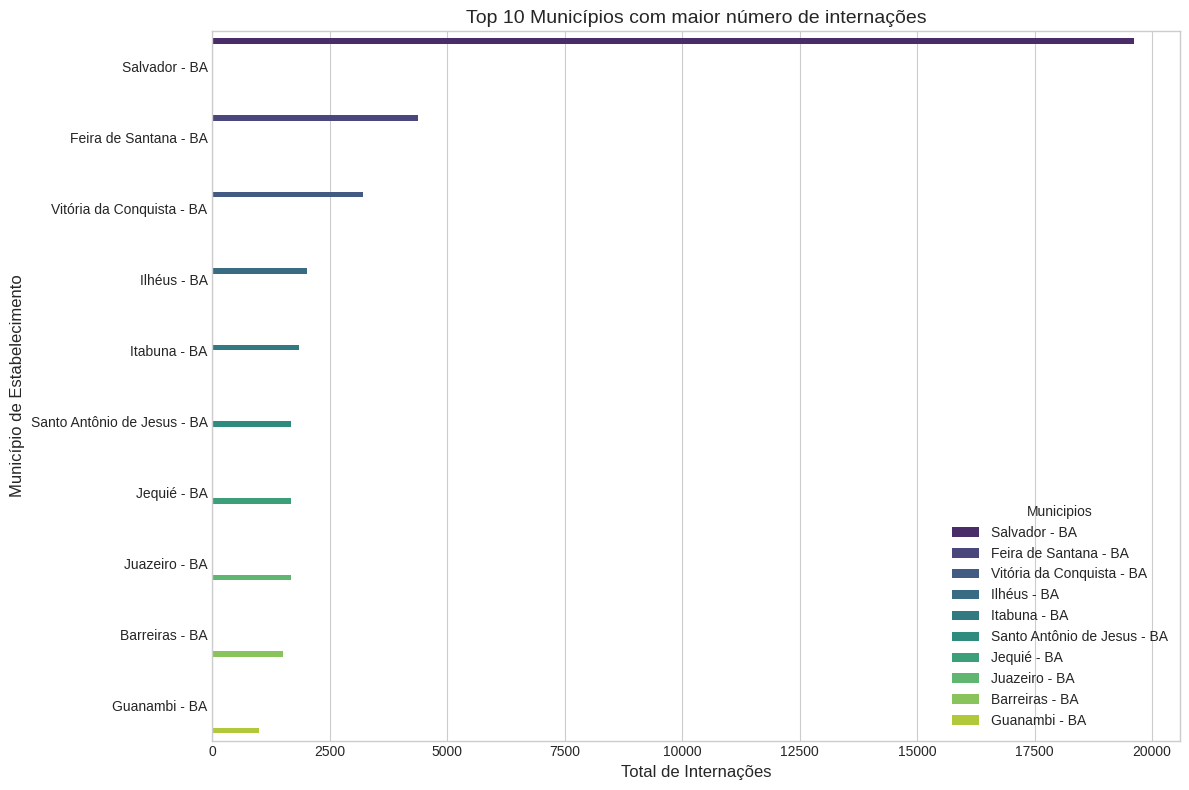

In [106]:
# Contagem das 10 cidades com mais internações
contagem_internacoes = df['MUNIC_MOV'].value_counts().nlargest(10).reset_index()
contagem_internacoes['MUNIC_MOV'] = contagem_internacoes['MUNIC_MOV'].astype(str)
contagem_internacoes.columns = ['MUNIC_MOV', 'INTER']

# Merge com o dataframe de municípios
top_municipios = pd.merge(
    contagem_internacoes,
    df_municipios,
    left_on='MUNIC_MOV',
    right_on='Codigo'
)

# Criando coluna com nome formatado
top_municipios['Municipios'] = top_municipios['Nome'] + ' - ' + top_municipios['Uf']

# Gráfico
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(
    data=top_municipios,
    x='INTER',
    y='Municipios',
    hue='Municipios',
    palette='viridis',
    ax=ax
)

ax.set_title('Top 10 Municípios com maior número de internações', fontsize=14)
ax.set_xlabel('Total de Internações', fontsize=12)
ax.set_ylabel('Município de Estabelecimento', fontsize=12)
plt.tight_layout()
plt.show()
